In [1]:
import pandas as pd

# set file path (raw string avoids issues with backslashes)
file_path = r"C:\Users\Bryan\Documents\Dataset\merged_df.csv"

# load CSV
df = pd.read_csv(file_path)

# quick check
df.head()


,Country Name,Year,Adjusted net national income (annual % growth)_adjusted_net_savings,Adjusted net national income (constant 2015 US$)_adjusted_net_savings,Adjusted net national income (current US$)_adjusted_net_savings,Adjusted net national income per capita (annual % growth)_adjusted_net_savings,Adjusted net national income per capita (constant 2015 US$)_adjusted_net_savings,Adjusted net national income per capita (current US$)_adjusted_net_savings,Adjusted net savings per capita (current US$)_adjusted_net_savings,Adjusted savings: carbon dioxide damage (% of GNI)_adjusted_net_savings,...,Worried about not being able to pay for medical costs in case of a serious illness or accident: very worried (% age 15+)_gender_statistics,Worried about not being able to pay school fees or fees for education: not worried at all (% age 15+)_gender_statistics,Worried about not being able to pay school fees or fees for education: somewhat worried (% age 15+)_gender_statistics,Worried about not being able to pay school fees or fees for education: very worried (% age 15+)_gender_statistics,Worried about not having enough money for monthly expenses or bills: not worried at all (% age 15+)_gender_statistics,Worried about not having enough money for monthly expenses or bills: somewhat worried (% age 15+)_gender_statistics,Worried about not having enough money for monthly expenses or bills: very worried (% age 15+)_gender_statistics,Worried about not having enough money for old age: not worried at all (% age 15+)_gender_statistics,Worried about not having enough money for old age: somewhat worried (% age 15+)_gender_statistics,Worried about not having enough money for old age: very worried (% age 15+)_gender_statistics
0,Philippines,1970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Philippines,1970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Philippines,1970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Philippines,1970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Philippines,1970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
# Inspect structure
print("Shape of dataset:", df.shape)

# Show sample rows
display(df.head())

# List all available columns
all_columns = df.columns.tolist()

# Narrow down to candidate targets (CPI, inflation, price, wage, productivity, etc.)
keywords = ["cpi", "inflation", "price", "wage", "productivity"]
candidate_targets = [col for col in all_columns if any(k in col.lower() for k in keywords)]

print("\nCandidate target columns:")
for col in candidate_targets:
    print("-", col)


Shape of dataset: (260, 2692)


,Country Name,Year,Adjusted net national income (annual % growth)_adjusted_net_savings,Adjusted net national income (constant 2015 US$)_adjusted_net_savings,Adjusted net national income (current US$)_adjusted_net_savings,Adjusted net national income per capita (annual % growth)_adjusted_net_savings,Adjusted net national income per capita (constant 2015 US$)_adjusted_net_savings,Adjusted net national income per capita (current US$)_adjusted_net_savings,Adjusted net savings per capita (current US$)_adjusted_net_savings,Adjusted savings: carbon dioxide damage (% of GNI)_adjusted_net_savings,...,Worried about not being able to pay for medical costs in case of a serious illness or accident: very worried (% age 15+)_gender_statistics,Worried about not being able to pay school fees or fees for education: not worried at all (% age 15+)_gender_statistics,Worried about not being able to pay school fees or fees for education: somewhat worried (% age 15+)_gender_statistics,Worried about not being able to pay school fees or fees for education: very worried (% age 15+)_gender_statistics,Worried about not having enough money for monthly expenses or bills: not worried at all (% age 15+)_gender_statistics,Worried about not having enough money for monthly expenses or bills: somewhat worried (% age 15+)_gender_statistics,Worried about not having enough money for monthly expenses or bills: very worried (% age 15+)_gender_statistics,Worried about not having enough money for old age: not worried at all (% age 15+)_gender_statistics,Worried about not having enough money for old age: somewhat worried (% age 15+)_gender_statistics,Worried about not having enough money for old age: very worried (% age 15+)_gender_statistics
0,Philippines,1970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Philippines,1970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Philippines,1970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Philippines,1970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Philippines,1970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Candidate target columns:
- Getting electricity: Price of electricity (US cents per kWh) (DB16-20 methodology)_doing_business
- GDP at market prices (constant 2005 US$)_education
- GDP at market prices (current US$)_education
- Received wages or government transfers into an account (% age 15+)_financial_inclusion
- Received wages or government transfers into an account (% age 60+)_financial_inclusion
- Received wages or government transfers into an account (% ages 35-59)_financial_inclusion
- Consumer price index (2010 = 100)_jobs
- Consumer price index (2010 = 100)_wdi
- Logistics performance index: Ease of arranging competitively priced shipments (1=low to 5=high)_wdi
- Price level ratio of PPP conversion factor (GDP) to market exchange rate_wdi
- Wholesale price index (2010 = 100)_wdi
- First financial institution account ever was opened to receive a wage payment (% age 15+)_health_nutrition
- First financial institution account ever was opened to receive a wage payment or money fr

# Wage Policy Impact Model — Project Goal and Overview

## 1. Background
The Senate is currently deliberating wage policy reforms, including proposals from Senator Imee Marcos for a unified national wage-setting framework. This project aims to provide a transparent, data-driven analysis of how wage changes may affect inflation and productivity dynamics in the Philippines.

## 2. Goal
Develop an econometric model that quantifies the impact of wage policy changes on inflation, using productivity and unit labor costs (ULC) as central channels. The model will generate 12–24 month scenario forecasts to support evidence-based decision making.

## 3. Targets (Dependent Variables)
- **Primary Target**
  - Consumer Price Index (2010 = 100)
- **Secondary Targets (optional)**
  - Wholesale Price Index (2010 = 100)
  - Electricity Price (US cents/kWh)

## 4. Key Features (Exogenous Variables)
- **Productivity**
  - GDP per person employed (constant 1990 PPP $)
  - GDP per person employed (constant 2021 PPP $)
- **Unit Labor Costs (ULC)**
  - Constructed from wage shocks relative to productivity growth
  - ΔULC and lagged values as predictors
- **Energy Controls**
  - Oil and natural gas (already included in EconCast PH)
- **Macro Controls (optional)**
  - GDP (constant/current)
  - PPP price-level ratio
  - Logistics and cost indices

## 5. Methodology
- **Model**
  - SARIMAX time-series framework with exogenous drivers (ΔULC, oil, natural gas, PPP ratio, optional logistics indices)
- **Scenario Design**
  - Scenario A: Flat ₱200/day wage increase
  - Scenario B: Unified national minimum wage
- **Employment Effects (optional)**
  - Estimated using labor-demand elasticity ranges from existing literature

## 6. Validation
- Diagnostic tests: residual autocorrelation, stability, and significance
- Fit comparison: models with and without productivity/ULC
- Sensitivity analysis: ULC lag structures, alternative productivity bases

## 7. Outputs
- Forecast plots: baseline vs. wage scenarios (12–24 months)
- ULC and productivity trajectories
- Tables of assumptions, results, and sensitivity ranges
- Policy summary deck (4–6 slides) for decision makers

## 8. Caveats
- Minimum wage differs from average wage, particularly in informal sectors
- Data vintages and reporting lags may affect timeliness
- Employment impact ranges rely on literature-based elasticities

## 9. Next Steps
1. Confirm which CPI variant to use as the canonical target
2. Compute productivity indices and construct ULC measures
3. Extend the existing EconCast PH SARIMAX model with new features
4. Implement wage shock scenarios
5. Prepare policy brief and presentation materials


Summary statistics for candidate variables:


,count,mean,std,min,25%,50%,75%,max
Year,260.0,1.995500e+03,1.503728e+01,1970.000000,1.982750e+03,1.995500e+03,2.008250e+03,2.021000e+03
Getting electricity: Price of electricity (US cents per kWh) (DB16-20 methodology)_doing_business,260.0,2.100000e+00,5.839983e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01
Annual statutory teacher salaries in public institutions in USD. Lower Secondary. Starting salary_education,260.0,8.403088e+02,2.930505e+03,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.262000e+04
Annual statutory teacher salaries in public institutions in USD. Primary. Starting salary_education,260.0,8.403175e+02,2.930540e+03,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.262046e+04
Annual statutory teacher salaries in public institutions in USD. Upper Secondary. Starting salary_education,260.0,8.403088e+02,2.930505e+03,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.262000e+04
GDP at market prices (constant 2005 US$)_education,260.0,1.213001e+11,7.509298e+10,0.000000,7.579315e+10,9.540308e+10,1.589300e+11,3.223007e+11
GDP at market prices (current US$)_education,260.0,9.136847e+10,9.429867e+10,0.000000,2.927680e+10,5.367221e+10,1.078564e+11,3.309103e+11
Received wages or government transfers into an account (% age 15+)_financial_inclusion,260.0,4.986985e-01,2.587724e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.639828e+01
Received wages or government transfers into an account (% age 60+)_financial_inclusion,260.0,5.103290e-01,2.725839e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.808093e+01
Received wages or government transfers into an account (% ages 35-59)_financial_inclusion,260.0,5.431442e-01,2.823527e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.795959e+01


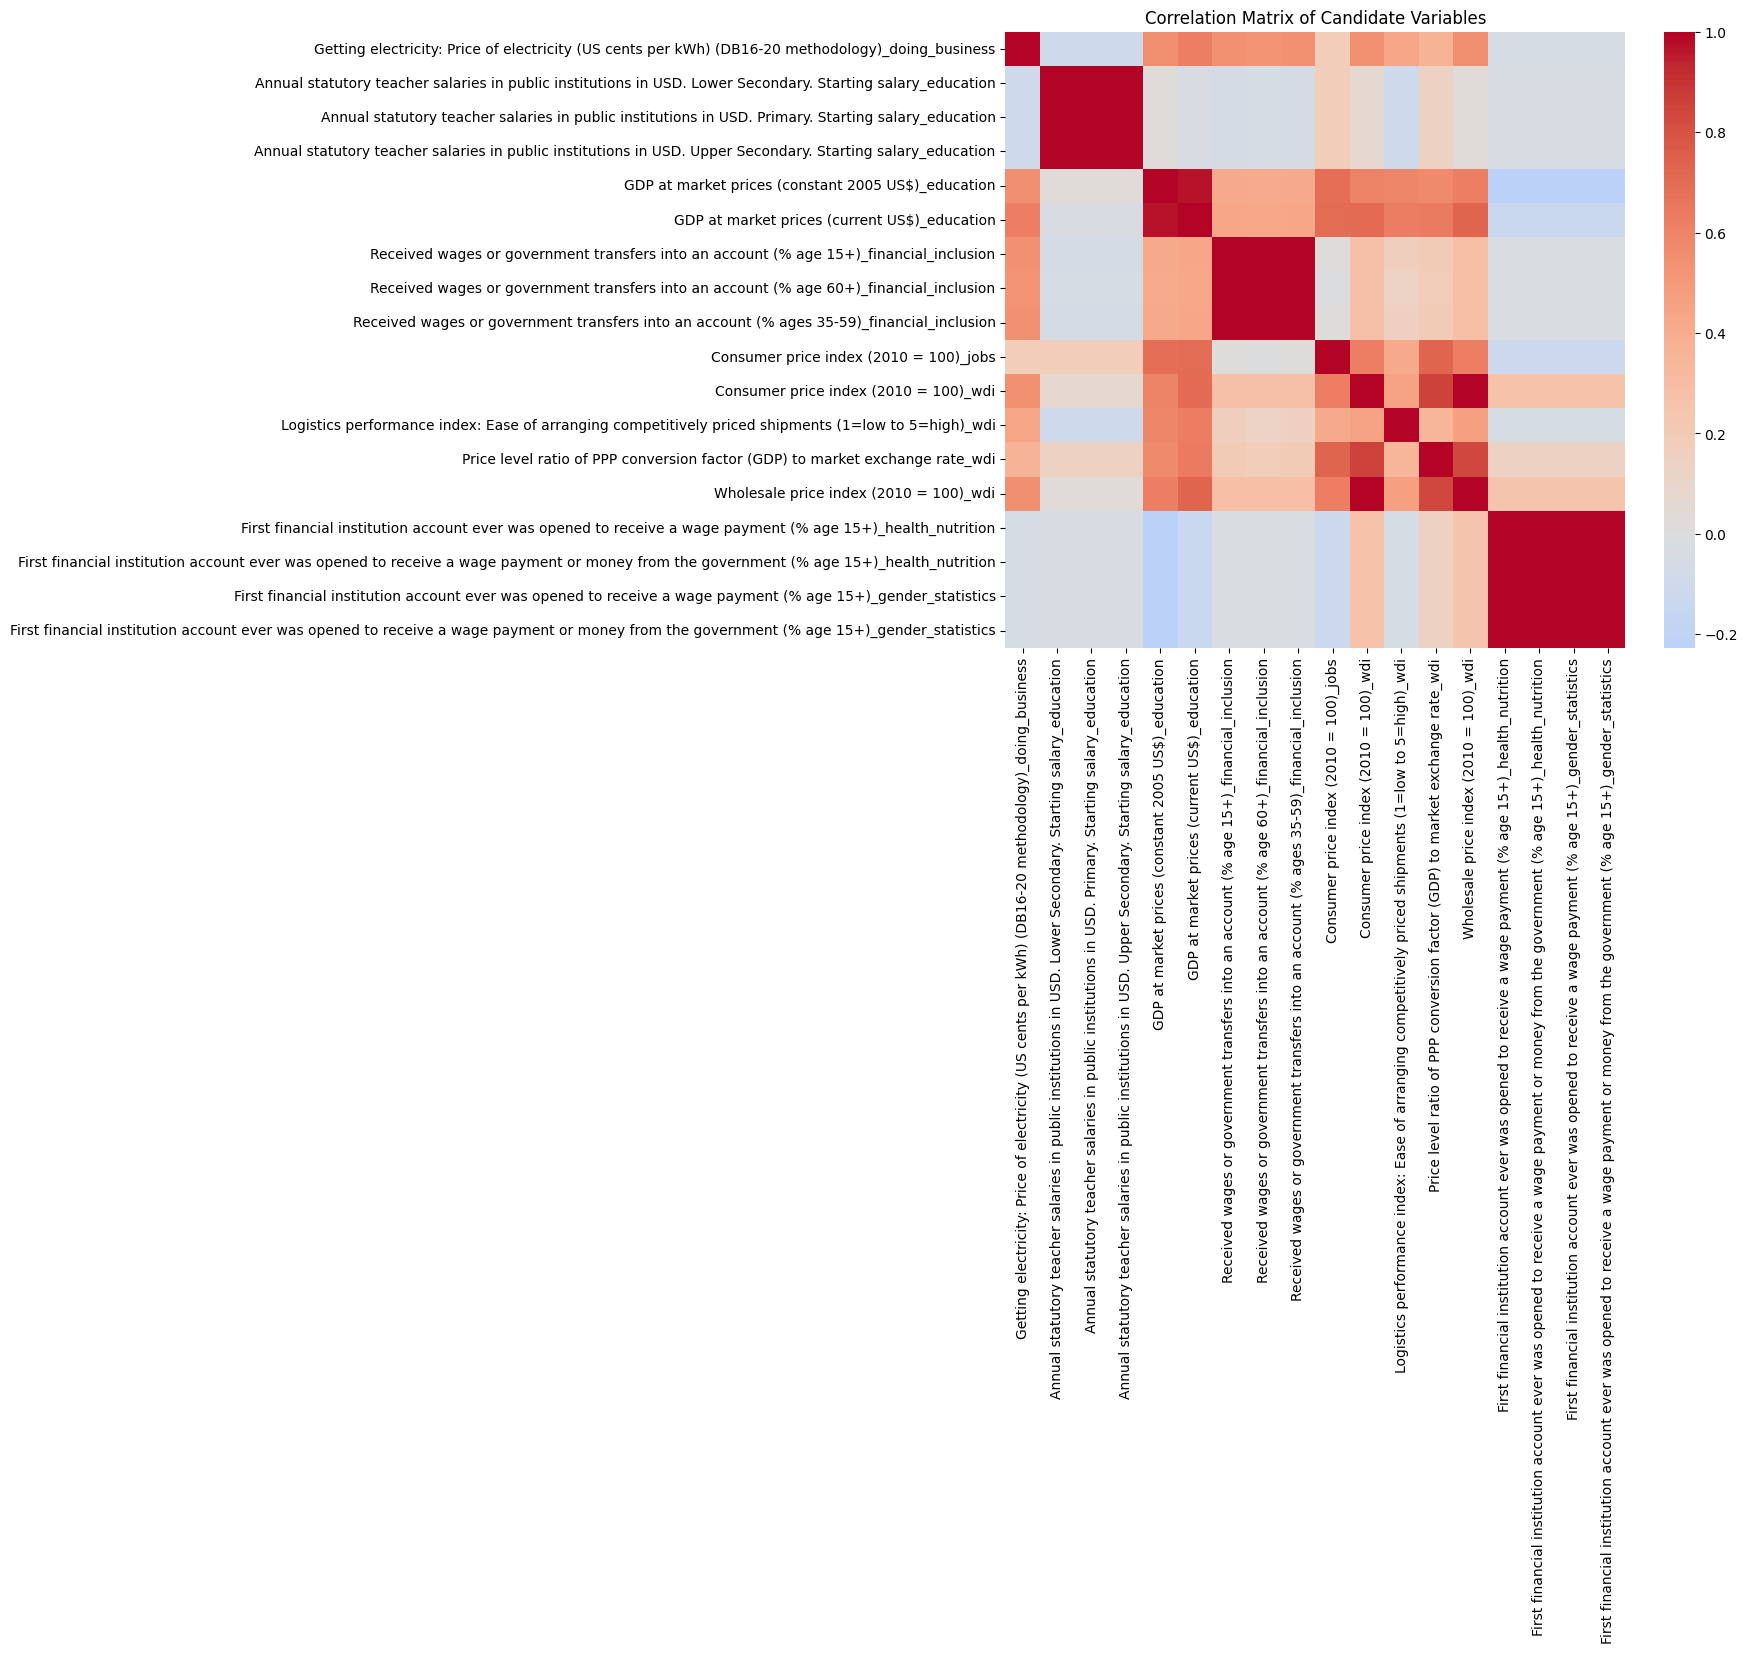

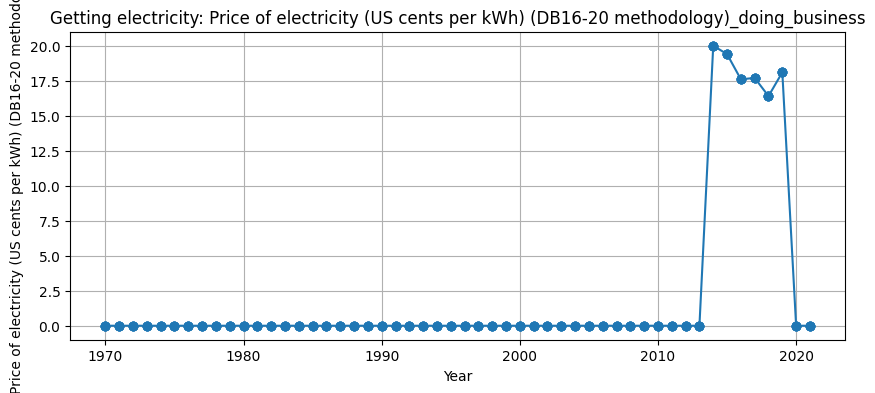

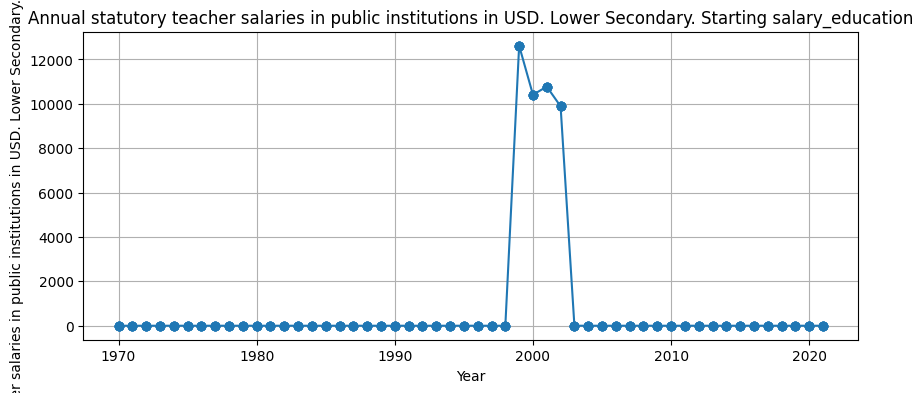

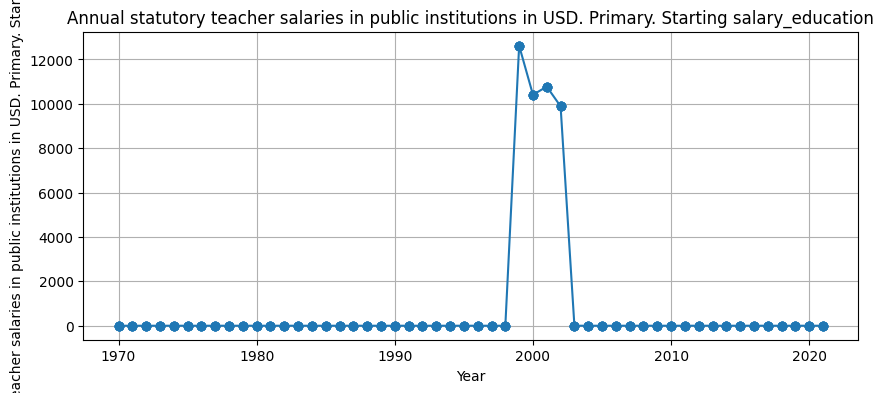

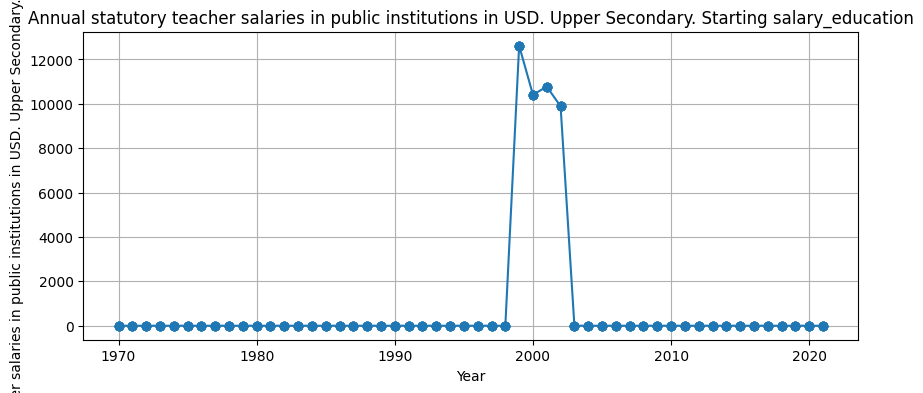

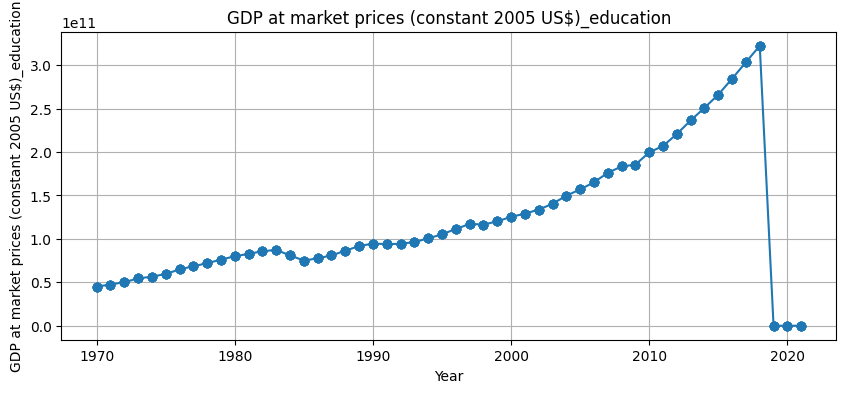

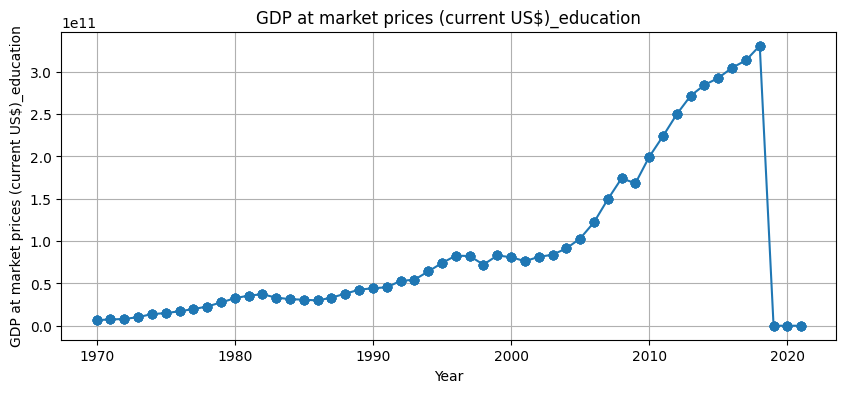

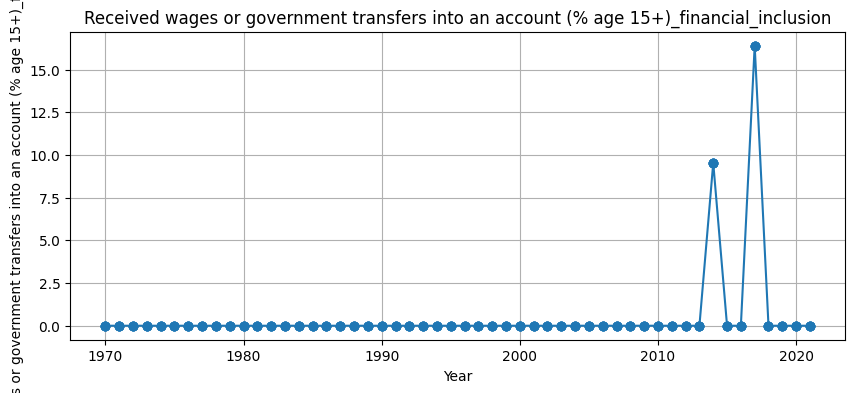

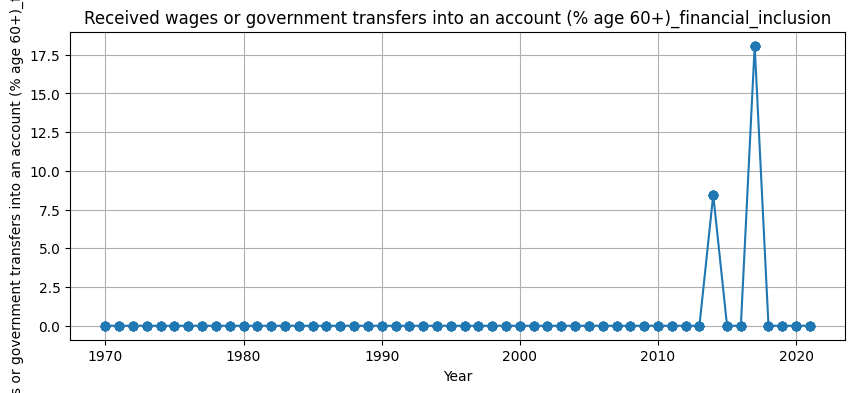

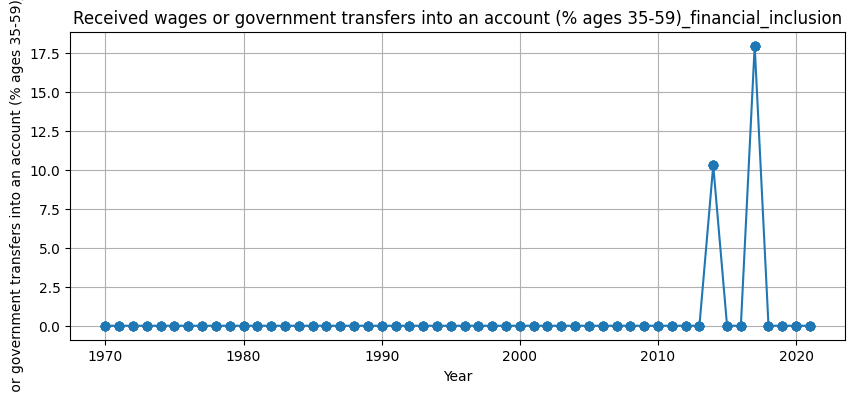

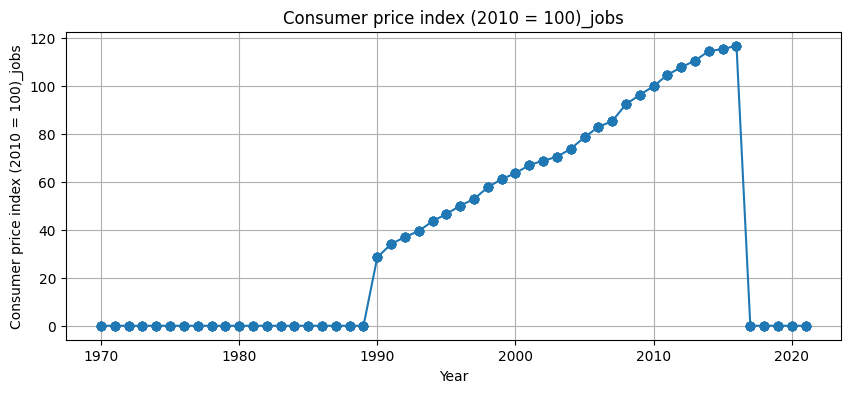

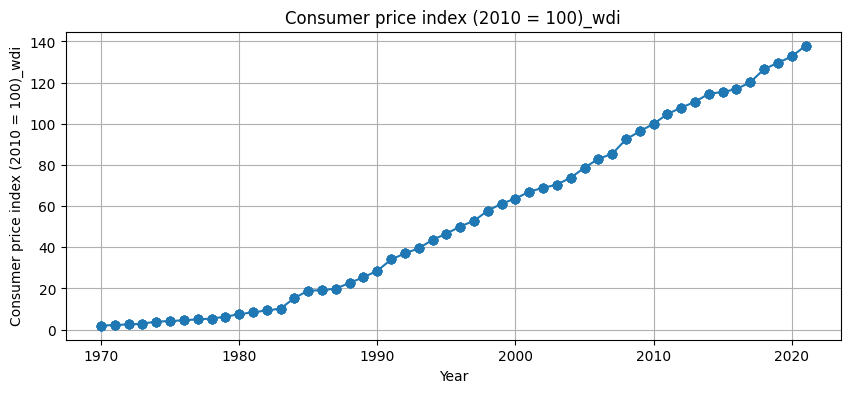

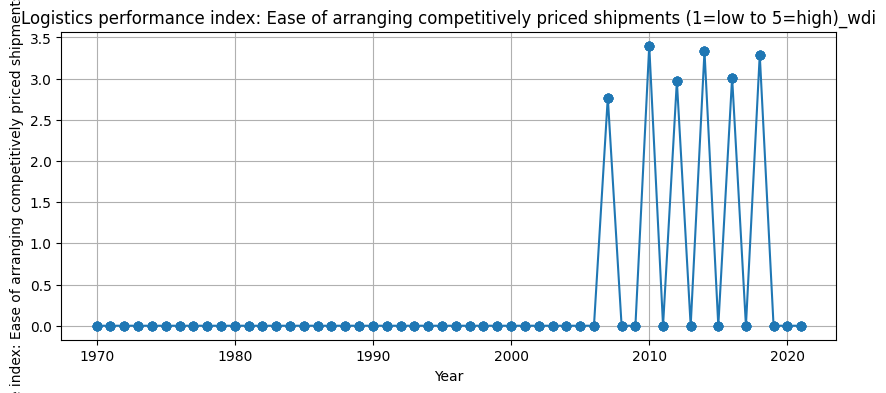

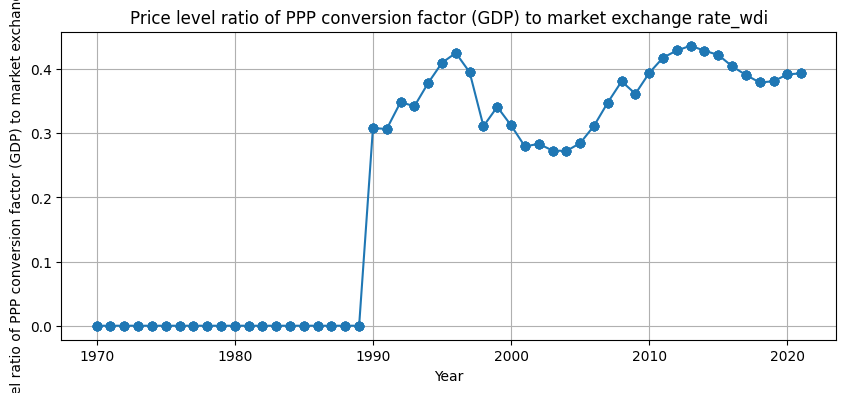

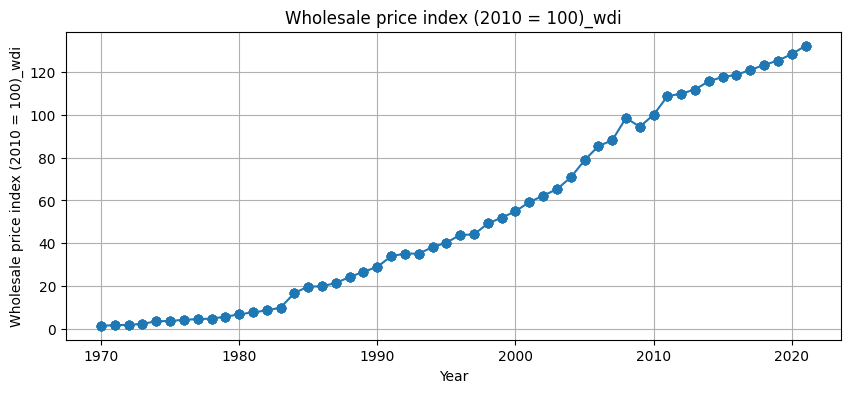

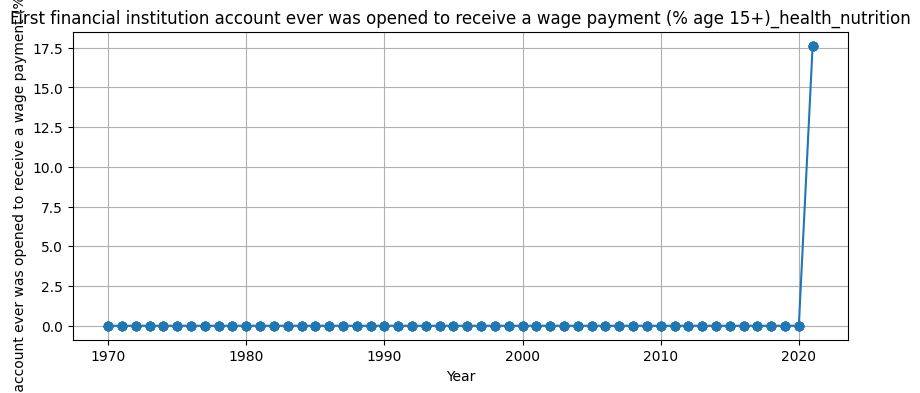

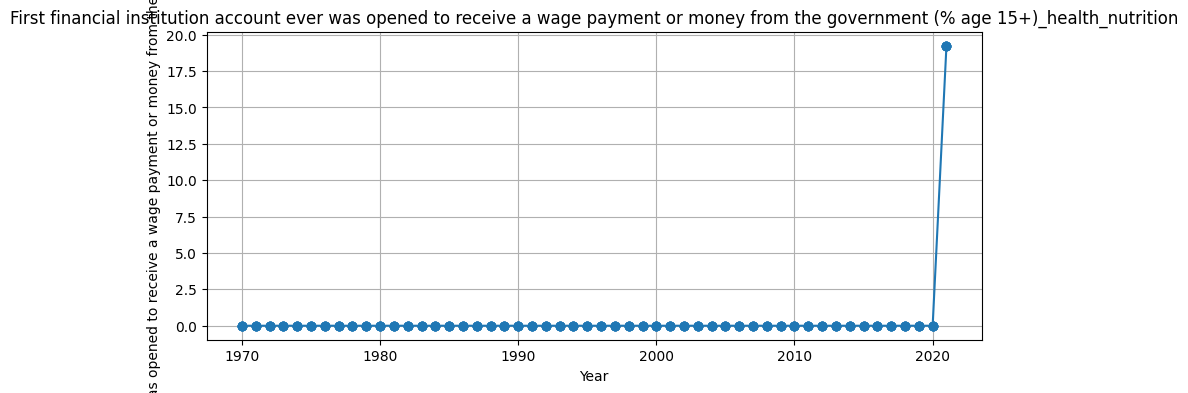

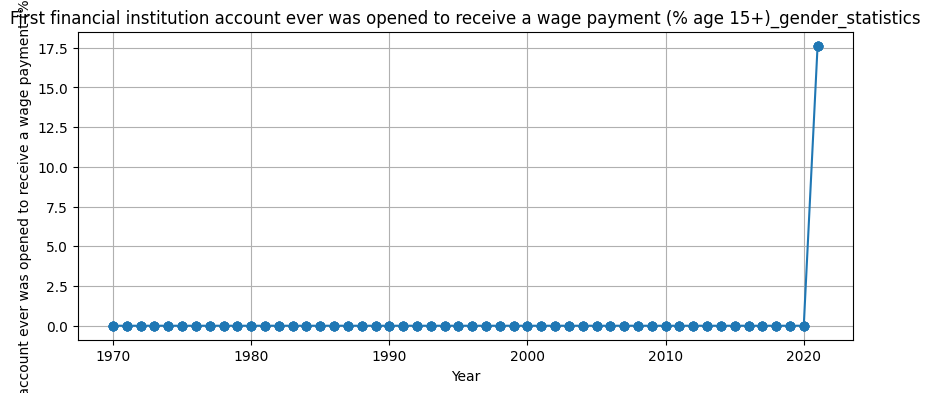

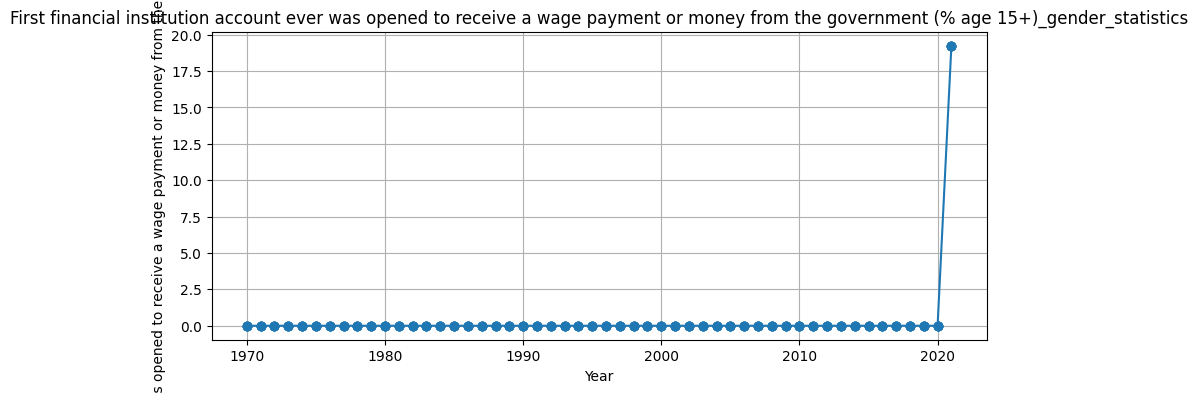

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Select relevant columns for EDA
eda_keywords = ["cpi", "inflation", "price", "wage", "salary", "productivity"]
eda_cols = [col for col in df.columns if any(k in col.lower() for k in eda_keywords)]

eda_df = df[["Year"] + eda_cols].copy()

# 2. Summary statistics
print("Summary statistics for candidate variables:")
display(eda_df.describe(include="all").transpose())

# 3. Correlation matrix
plt.figure(figsize=(10, 8))
corr = eda_df.drop(columns=["Year"]).corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Candidate Variables")
plt.show()

# 4. Time-series plots
for col in eda_cols:
    plt.figure(figsize=(10, 4))
    plt.plot(eda_df["Year"], eda_df[col], marker="o")
    plt.title(col)
    plt.xlabel("Year")
    plt.ylabel(col)
    plt.grid(True)
    plt.show()


In [4]:
# 1. Select relevant columns for EDA
eda_keywords = ["cpi", "inflation", "price", "wage", "salary", "productivity"]
eda_cols = [col for col in df.columns if any(k in col.lower() for k in eda_keywords)]
eda_df = df[["Year"] + eda_cols].copy()

# 2. Summary statistics
print("=== Summary Statistics ===")
summary_stats = eda_df.describe().transpose()
display(summary_stats)

# 3. Correlation matrix (numerical)
print("\n=== Correlation Matrix ===")
corr_matrix = eda_df.drop(columns=["Year"]).corr()
display(corr_matrix)

# 4. Correlation of each variable with CPI (choose one CPI variant if multiple exist)
cpi_candidates = [c for c in eda_cols if "cpi" in c.lower()]
if cpi_candidates:
    main_cpi = cpi_candidates[0]  # pick the first CPI variant found
    print(f"\n=== Correlation with {main_cpi} ===")
    cpi_corr = corr_matrix[main_cpi].sort_values(ascending=False)
    display(cpi_corr)


=== Summary Statistics ===


,count,mean,std,min,25%,50%,75%,max
Year,260.0,1.995500e+03,1.503728e+01,1970.000000,1.982750e+03,1.995500e+03,2.008250e+03,2.021000e+03
Getting electricity: Price of electricity (US cents per kWh) (DB16-20 methodology)_doing_business,260.0,2.100000e+00,5.839983e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01
Annual statutory teacher salaries in public institutions in USD. Lower Secondary. Starting salary_education,260.0,8.403088e+02,2.930505e+03,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.262000e+04
Annual statutory teacher salaries in public institutions in USD. Primary. Starting salary_education,260.0,8.403175e+02,2.930540e+03,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.262046e+04
Annual statutory teacher salaries in public institutions in USD. Upper Secondary. Starting salary_education,260.0,8.403088e+02,2.930505e+03,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.262000e+04
GDP at market prices (constant 2005 US$)_education,260.0,1.213001e+11,7.509298e+10,0.000000,7.579315e+10,9.540308e+10,1.589300e+11,3.223007e+11
GDP at market prices (current US$)_education,260.0,9.136847e+10,9.429867e+10,0.000000,2.927680e+10,5.367221e+10,1.078564e+11,3.309103e+11
Received wages or government transfers into an account (% age 15+)_financial_inclusion,260.0,4.986985e-01,2.587724e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.639828e+01
Received wages or government transfers into an account (% age 60+)_financial_inclusion,260.0,5.103290e-01,2.725839e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.808093e+01
Received wages or government transfers into an account (% ages 35-59)_financial_inclusion,260.0,5.431442e-01,2.823527e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.795959e+01



=== Correlation Matrix ===


,Getting electricity: Price of electricity (US cents per kWh) (DB16-20 methodology)_doing_business,Annual statutory teacher salaries in public institutions in USD. Lower Secondary. Starting salary_education,Annual statutory teacher salaries in public institutions in USD. Primary. Starting salary_education,Annual statutory teacher salaries in public institutions in USD. Upper Secondary. Starting salary_education,GDP at market prices (constant 2005 US$)_education,GDP at market prices (current US$)_education,Received wages or government transfers into an account (% age 15+)_financial_inclusion,Received wages or government transfers into an account (% age 60+)_financial_inclusion,Received wages or government transfers into an account (% ages 35-59)_financial_inclusion,Consumer price index (2010 = 100)_jobs,Consumer price index (2010 = 100)_wdi,Logistics performance index: Ease of arranging competitively priced shipments (1=low to 5=high)_wdi,Price level ratio of PPP conversion factor (GDP) to market exchange rate_wdi,Wholesale price index (2010 = 100)_wdi,First financial institution account ever was opened to receive a wage payment (% age 15+)_health_nutrition,First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+)_health_nutrition,First financial institution account ever was opened to receive a wage payment (% age 15+)_gender_statistics,First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+)_gender_statistics
Getting electricity: Price of electricity (US cents per kWh) (DB16-20 methodology)_doing_business,1.000000,-0.103509,-0.103509,-0.103509,0.554329,0.621819,0.544793,0.525624,0.543526,0.187959,0.540195,0.441646,0.360449,0.551673,-0.050450,-0.050450,-0.050450,-0.050450
Annual statutory teacher salaries in public institutions in USD. Lower Secondary. Starting salary_education,-0.103509,1.000000,1.000000,1.000000,0.020311,-0.033192,-0.055474,-0.053891,-0.055372,0.181621,0.067400,-0.103453,0.134087,0.023368,-0.040230,-0.040230,-0.040230,-0.040230
Annual statutory teacher salaries in public institutions in USD. Primary. Starting salary_education,-0.103509,1.000000,1.000000,1.000000,0.020310,-0.033192,-0.055474,-0.053891,-0.055372,0.181620,0.067400,-0.103453,0.134087,0.023368,-0.040230,-0.040230,-0.040230,-0.040230
Annual statutory teacher salaries in public institutions in USD. Upper Secondary. Starting salary_education,-0.103509,1.000000,1.000000,1.000000,0.020311,-0.033192,-0.055474,-0.053891,-0.055372,0.181621,0.067400,-0.103453,0.134087,0.023368,-0.040230,-0.040230,-0.040230,-0.040230
GDP at market prices (constant 2005 US$)_education,0.554329,0.020311,0.020310,0.020311,1.000000,0.974614,0.419291,0.413769,0.419000,0.689338,0.604090,0.587891,0.570720,0.625106,-0.226628,-0.226628,-0.226628,-0.226628
GDP at market prices (current US$)_education,0.621819,-0.033192,-0.033192,-0.033192,0.974614,1.000000,0.434066,0.424518,0.433480,0.695031,0.705826,0.626695,0.638161,0.728602,-0.135938,-0.135938,-0.135938,-0.135938
Received wages or government transfers into an account (% age 15+)_financial_inclusion,0.544793,-0.055474,-0.055474,-0.055474,0.419291,0.434066,1.000000,0.995898,0.999978,0.016887,0.279997,0.166438,0.195976,0.290828,-0.027038,-0.027038,-0.027038,-0.027038
Received wages or government transfers into an account (% age 60+)_financial_inclusion,0.525624,-0.053891,-0.053891,-0.053891,0.413769,0.424518,0.995898,1.000000,0.996482,-0.008751,0.273175,0.131140,0.188456,0.283630,-0.026266,-0.026266,-0.026266,-0.026266
Received wages or government transfers into an account (% ages 35-59)_financial_inclusion,0.543526,-0.055372,-0.055372,-0.055372,0.419000,0.433480,0.999978,0.996482,1.000000,0.014991,0.279570,0.163869,0.195474,0.290376,-0.026988,-0.026988,-0.026988,-0.026988
Consumer price index (2010 = 100)_jobs,0.187959,0.181621,0.181620,0.181621,0.689338,0.695031,0.016887,-0.008751,0.014991,1.000000,0.616701,0.4

# EDA Analysis — Technical

## Summary Statistics
- **CPI (2010=100):** Values span from near zero up to 137, reflecting long-run inflationary growth. Both `_jobs` and `_wdi` series are present; the WDI series shows higher mean and maximum values.
- **WPI (2010=100):** Closely tracks CPI, with maximum ~132 and strong correlation with CPI (r ≈ 0.99).
- **Electricity Price:** Sparse but positively correlated with CPI and GDP (r ≈ 0.54 with CPI_wdi).
- **Teacher Salaries:** Mostly zeroes with spikes, weakly correlated with CPI (r ≈ 0.07–0.18).
- **GDP (constant/current):** High positive correlation with CPI (`r` ~0.60–0.70) and with WPI (`r` ~0.63–0.73).
- **PPP Conversion Ratio:** Strong correlation with CPI_wdi (r ≈ 0.85) and WPI (r ≈ 0.83).
- **Logistics Index:** Moderate positive correlation with CPI_wdi (r ≈ 0.45).

## Correlation Highlights
- CPI_wdi and WPI_wdi are near-perfectly correlated (r ≈ 0.997).
- CPI_wdi correlates strongly with PPP ratio (0.85) and GDP (0.70).
- Wage-related account and teacher salary variables show weak or negative relationships with CPI.
- Electricity price correlates moderately with CPI_wdi (0.54) and GDP (0.62).

**Conclusion:** For modeling inflation, the CPI (WDI variant) is the most reliable target. WPI can serve as a robustness check. Electricity price and PPP ratio provide useful explanatory power, while teacher salary series are not consistent enough to be primary drivers.


# EDA Analysis — Non-Technical

The data shows that the Consumer Price Index (CPI) rises steadily over time and strongly tracks with overall economic growth (GDP) and the cost of goods at the wholesale level. Wholesale prices and CPI are almost identical in how they move together. Electricity prices also rise alongside CPI, though the link is weaker.

Measures like teacher starting salaries and survey-based wage account usage are inconsistent and do not show a strong relationship with inflation. By contrast, the ratio between the peso and international purchasing power (PPP ratio) is very strongly tied to CPI trends.

**In plain terms:** Inflation (CPI) is closely connected to wholesale prices, overall GDP, electricity costs, and international exchange rates. Teacher salaries and wage-related survey responses are not strong predictors. This suggests CPI should remain the main outcome to track, with wholesale prices and electricity as useful secondary checks.


# Next Steps and Rationale

## 1. Confirm Target
- **Step:** Fix `Consumer price index (2010=100)_wdi` as the canonical target.
- **Rationale:** Strong correlations with GDP, PPP ratio, and WPI. Internationally standardized, making results more defensible.

## 2. Feature Construction
- **Step:** Build productivity-based measures:
  - Normalize `GDP per person employed` to form a productivity index.
  - Compute Unit Labor Costs (ULC) = wage proxy ÷ productivity.
  - Create ΔULC (% change) and test lags.
- **Rationale:** Productivity and ULC are the direct channels through which wage policy affects inflation.

## 3. Exogenous Variables
- **Step:** Select explanatory features:
  - ΔULC
  - GDP (constant/current)
  - PPP conversion factor
  - Oil and natural gas (from EconCast PH)
  - Electricity price (secondary)
- **Rationale:** Captures both domestic and external drivers of inflation.

## 4. Modeling
- **Step:** Fit SARIMAX with CPI_wdi as target and above features as exogenous.
- **Rationale:** SARIMAX handles time dependence while incorporating policy-relevant variables.

## 5. Scenario Design
- **Step:** Implement wage-shock scenarios:
  - Scenario A: Flat ₱200/day wage increase.
  - Scenario B: Unified national minimum wage.
- **Rationale:** Directly links committee proposals to measurable economic outcomes.

## 6. Validation
- **Step:** Test model fit:
  - Residual diagnostics (autocorrelation, stability).
  - Compare with/without productivity and ULC.
  - Out-of-sample forecast accuracy.
- **Rationale:** Ensures robustness and credibility before presenting to policymakers.

## 7. Deliverables
- **Step:** Prepare outputs:
  - CPI forecasts under baseline and scenarios.
  - ULC and productivity trajectories.
  - 4–6 slide policy deck summarizing results.
- **Rationale:** Outputs must be actionable and easily digestible for decision makers.

---

# Non-Technical Summary

The next step is to focus on inflation (CPI) as our main measure, since it is the clearest indicator of how wage policies affect prices. We will combine wage and productivity data to measure how much labor costs rise, and then see how this affects inflation using a forecasting model. By testing different wage proposals, we can show possible outcomes for inflation and employment over the next one to two years. The results will be presented as clear charts and a short policy brief to help guide decisions.


In [5]:
import pandas as pd

# --- 1. Select target and core features ---

# Target: CPI (WDI variant)
target_col = "Consumer price index (2010 = 100)_wdi"

# Productivity series
prod_cols = [
    "GDP per person employed (constant 1990 PPP $)_jobs",
    "GDP per person employed (constant 2021 PPP $)_wdi"
]

# Exogenous features
feature_cols = [
    "GDP at market prices (constant 2005 US$)_education",
    "GDP at market prices (current US$)_education",
    "Price level ratio of PPP conversion factor (GDP) to market exchange rate_wdi",
    "Getting electricity: Price of electricity (US cents per kWh) (DB16-20 methodology)_doing_business"
]

# Subset dataframe
eda_core = df[["Year", target_col] + prod_cols + feature_cols].copy()

# --- 2. Build productivity index (normalize to 2010=100 for clarity) ---
for col in prod_cols:
    base_year_val = eda_core.loc[eda_core["Year"] == 2010, col].mean()
    eda_core[f"{col}_index"] = (eda_core[col] / base_year_val) * 100

# --- 3. Compute productivity growth rates ---
for col in prod_cols:
    eda_core[f"{col}_growth"] = eda_core[col].pct_change() * 100

# --- 4. Placeholder for ULC construction ---
# Since we don't have continuous wage data, we will simulate wage shocks later.
# For now, create a baseline ULC proxy = GDP per person employed (inverse of productivity).
eda_core["ULC_proxy"] = 1 / eda_core[prod_cols[1]]  # use 2021 PPP variant
eda_core["ULC_proxy_growth"] = eda_core["ULC_proxy"].pct_change() * 100

# --- 5. Quick check ---
print("Columns prepared for modeling:")
print(eda_core.columns.tolist())

display(eda_core.head(15))


Columns prepared for modeling:
['Year', 'Consumer price index (2010 = 100)_wdi', 'GDP per person employed (constant 1990 PPP $)_jobs', 'GDP per person employed (constant 2021 PPP $)_wdi', 'GDP at market prices (constant 2005 US$)_education', 'GDP at market prices (current US$)_education', 'Price level ratio of PPP conversion factor (GDP) to market exchange rate_wdi', 'Getting electricity: Price of electricity (US cents per kWh) (DB16-20 methodology)_doing_business', 'GDP per person employed (constant 1990 PPP $)_jobs_index', 'GDP per person employed (constant 2021 PPP $)_wdi_index', 'GDP per person employed (constant 1990 PPP $)_jobs_growth', 'GDP per person employed (constant 2021 PPP $)_wdi_growth', 'ULC_proxy', 'ULC_proxy_growth']


,Year,Consumer price index (2010 = 100)_wdi,GDP per person employed (constant 1990 PPP $)_jobs,GDP per person employed (constant 2021 PPP $)_wdi,GDP at market prices (constant 2005 US$)_education,GDP at market prices (current US$)_education,Price level ratio of PPP conversion factor (GDP) to market exchange rate_wdi,Getting electricity: Price of electricity (US cents per kWh) (DB16-20 methodology)_doing_business,GDP per person employed (constant 1990 PPP $)_jobs_index,GDP per person employed (constant 2021 PPP $)_wdi_index,GDP per person employed (constant 1990 PPP $)_jobs_growth,GDP per person employed (constant 2021 PPP $)_wdi_growth,ULC_proxy,ULC_proxy_growth
0,1970,1.901189,0.0,0.0,4.500643e+10,6.687205e+09,0.0,0.0,0.0,0.0,NaN,NaN,inf,NaN
1,1970,1.901189,0.0,0.0,4.500643e+10,6.687205e+09,0.0,0.0,0.0,0.0,NaN,NaN,inf,NaN
2,1970,1.901189,0.0,0.0,4.500643e+10,6.687205e+09,0.0,0.0,0.0,0.0,NaN,NaN,inf,NaN
3,1970,1.901189,0.0,0.0,4.500643e+10,6.687205e+09,0.0,0.0,0.0,0.0,NaN,NaN,inf,NaN
4,1970,1.901189,0.0,0.0,4.500643e+10,6.687205e+09,0.0,0.0,0.0,0.0,NaN,NaN,inf,NaN
5,1971,2.308107,0.0,0.0,4.744966e+10,7.408306e+09,0.0,0.0,0.0,0.0,NaN,NaN,inf,NaN
6,1971,2.308107,0.0,0.0,4.744966e+10,7.408306e+09,0.0,0.0,0.0,0.0,NaN,NaN,inf,NaN
7,1971,2.308107,0.0,0.0,4.744966e+10,7.408306e+09,0.0,0.0,0.0,0.0,NaN,NaN,inf,NaN
8,1971,2.308107,0.0,0.0,4.744966e+10,7.408306e+09,0.0,0.0,0.0,0.0,NaN,NaN,inf,NaN
9,1971,2.308107,0.0,0.0,4.744966e+10,7.408306e+09,0.0,0.0,0.0,0.0,NaN,NaN,inf,NaN


In [6]:
import numpy as np

# Replace zeros with NaN for productivity columns
for col in prod_cols:
    eda_core[col] = eda_core[col].replace(0, np.nan)

# Recompute productivity index (2010=100) safely
for col in prod_cols:
    if eda_core[col].notna().any():
        base_year_val = eda_core.loc[eda_core["Year"] == 2010, col].mean()
        eda_core[f"{col}_index"] = (eda_core[col] / base_year_val) * 100

# Recompute productivity growth (% change)
for col in prod_cols:
    eda_core[f"{col}_growth"] = eda_core[col].pct_change() * 100

# Recompute ULC proxy using 2021 PPP productivity
eda_core["ULC_proxy"] = 1 / eda_core["GDP per person employed (constant 2021 PPP $)_wdi"]
eda_core["ULC_proxy_growth"] = eda_core["ULC_proxy"].pct_change() * 100

# Drop rows where target or productivity is missing
eda_core_clean = eda_core.dropna(subset=[target_col, prod_cols[1]])

print("Shape after cleaning:", eda_core_clean.shape)
display(eda_core_clean.head(15))


Shape after cleaning: (155, 14)


C:\Users\Bryan\AppData\Local\Temp\ipykernel_23292\3647318932.py:15: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eda_core[f"{col}_growth"] = eda_core[col].pct_change() * 100


,Year,Consumer price index (2010 = 100)_wdi,GDP per person employed (constant 1990 PPP $)_jobs,GDP per person employed (constant 2021 PPP $)_wdi,GDP at market prices (constant 2005 US$)_education,GDP at market prices (current US$)_education,Price level ratio of PPP conversion factor (GDP) to market exchange rate_wdi,Getting electricity: Price of electricity (US cents per kWh) (DB16-20 methodology)_doing_business,GDP per person employed (constant 1990 PPP $)_jobs_index,GDP per person employed (constant 2021 PPP $)_wdi_index,GDP per person employed (constant 1990 PPP $)_jobs_growth,GDP per person employed (constant 2021 PPP $)_wdi_growth,ULC_proxy,ULC_proxy_growth
105,1991,34.090657,10937.495117,12705.149247,9.397339e+10,4.541756e+10,0.306767,0.0,77.636176,77.233372,NaN,NaN,0.000079,NaN
106,1991,34.090657,10937.495117,12705.149247,9.397339e+10,4.541756e+10,0.306767,0.0,77.636176,77.233372,0.000000,0.000000,0.000079,0.000000
107,1991,34.090657,10937.495117,12705.149247,9.397339e+10,4.541756e+10,0.306767,0.0,77.636176,77.233372,0.000000,0.000000,0.000079,0.000000
108,1991,34.090657,10937.495117,12705.149247,9.397339e+10,4.541756e+10,0.306767,0.0,77.636176,77.233372,0.000000,0.000000,0.000079,0.000000
109,1991,34.090657,10937.495117,12705.149247,9.397339e+10,4.541756e+10,0.306767,0.0,77.636176,77.233372,0.000000,0.000000,0.000079,0.000000
110,1992,37.039841,10628.788086,12439.693394,9.429065e+10,5.297634e+10,0.348509,0.0,75.444921,75.619692,-2.822466,-2.089356,0.000080,2.133942
111,1992,37.039841,10628.788086,12439.693394,9.429065e+10,5.297634e+10,0.348509,0.0,75.444921,75.619692,0.000000,0.000000,0.000080,0.000000
112,1992,37.039841,10628.788086,12439.693394,9.429065e+10,5.297634e+10,0.348509,0.0,75.444921,75.619692,0.000000,0.000000,0.000080,0.000000
113,1992,37.039841,10628.788086,12439.693394,9.429065e+10,5.297634e+10,0.348509,0.0,75.444921,75.619692,0.000000,0.000000,0.000080,0.000000
114,1992,37.039841,10628.788086,12439.693394,9.429065e+10,5.297634e+10,0.348509,0.0,75.444921,75.619692,0.000000,0.000000,0.000080,0.000000


In [7]:
from statsmodels.tsa.stattools import adfuller, kpss, grangercausalitytests

# --- Statistical Testing for CPI, Productivity, and ULC ---

# Why we're doing this:
# 1. Stationarity tests (ADF, KPSS) check if series need differencing before modeling (important for SARIMAX).
# 2. Cointegration (via Engle–Granger/Johansen, not shown here) would test long-run equilibrium relationships.
# 3. Granger causality checks if variables like productivity growth or ULC add predictive power for CPI.
# These tests add credibility to our model choices beyond simple correlations.

# Select series
cpi = eda_core_clean["Consumer price index (2010 = 100)_wdi"].dropna()
prod_growth = eda_core_clean["GDP per person employed (constant 2021 PPP $)_wdi_growth"].dropna()
ulc_growth = eda_core_clean["ULC_proxy_growth"].dropna()

def adf_test(series, name):
    result = adfuller(series.dropna())
    print(f"ADF Test for {name}:")
    print(f"  Test Statistic = {result[0]:.4f}")
    print(f"  p-value = {result[1]:.4f}")
    print(f"  Stationary at 5%? {'Yes' if result[1] <= 0.05 else 'No'}\n")

def kpss_test(series, name):
    result = kpss(series.dropna(), regression='c', nlags="auto")
    print(f"KPSS Test for {name}:")
    print(f"  Test Statistic = {result[0]:.4f}")
    print(f"  p-value = {result[1]:.4f}")
    print(f"  Stationary at 5%? {'Yes' if result[1] > 0.05 else 'No'}\n")

# --- Run ADF and KPSS ---
adf_test(cpi, "CPI (WDI)")
kpss_test(cpi, "CPI (WDI)")

adf_test(prod_growth, "Productivity Growth")
kpss_test(prod_growth, "Productivity Growth")

adf_test(ulc_growth, "ULC Growth")
kpss_test(ulc_growth, "ULC Growth")

# --- Granger Causality ---
# Test if productivity growth or ULC growth Granger-cause CPI
print("=== Granger Causality Tests ===")
granger_data = eda_core_clean[["Consumer price index (2010 = 100)_wdi", 
                               "GDP per person employed (constant 2021 PPP $)_wdi_growth", 
                               "ULC_proxy_growth"]].dropna()

# Test each variable up to 3 lags
print("\nProductivity Growth -> CPI")
grangercausalitytests(granger_data[["Consumer price index (2010 = 100)_wdi", 
                                    "GDP per person employed (constant 2021 PPP $)_wdi_growth"]], maxlag=3)

print("\nULC Growth -> CPI")
grangercausalitytests(granger_data[["Consumer price index (2010 = 100)_wdi", 
                                    "ULC_proxy_growth"]], maxlag=3)


ADF Test for CPI (WDI):
  Test Statistic = 0.3409
  p-value = 0.9791
  Stationary at 5%? No

KPSS Test for CPI (WDI):
  Test Statistic = 1.8275
  p-value = 0.0100
  Stationary at 5%? No

ADF Test for Productivity Growth:
  Test Statistic = -2.5875
  p-value = 0.0956
  Stationary at 5%? No

KPSS Test for Productivity Growth:
  Test Statistic = 0.4509
  p-value = 0.0552
  Stationary at 5%? Yes

ADF Test for ULC Growth:
  Test Statistic = -2.6249
  p-value = 0.0880
  Stationary at 5%? No

KPSS Test for ULC Growth:
  Test Statistic = 0.4375
  p-value = 0.0610
  Stationary at 5%? Yes

=== Granger Causality Tests ===

Productivity Growth -> CPI

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5742  , p=0.1107  , df_denom=150, df_num=1
ssr based chi2 test:   chi2=2.6256  , p=0.1051  , df=1
likelihood ratio test: chi2=2.6034  , p=0.1066  , df=1
parameter F test:         F=2.5742  , p=0.1107  , df_denom=150, df_num=1

Granger Causality
number of lags (no zero) 2
ssr b

C:\Users\Bryan\AppData\Local\Temp\ipykernel_23292\2047382339.py:24: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series.dropna(), regression='c', nlags="auto")


{np.int64(1): ({'ssr_ftest': (np.float64(2.5039456013878088),
    np.float64(0.11566768960971828),
    np.float64(150.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(2.554024513415565),
    np.float64(0.11001369908283083),
    np.int64(1)),
   'lrtest': (np.float64(2.532941685112746),
    np.float64(0.11149219012180092),
    np.int64(1)),
   'params_ftest': (np.float64(2.5039456013879353),
    np.float64(0.11566768960971088),
    np.float64(150.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(2.0880750241666832),
    np.float64(0.12758597651041736),
    np.float64(147.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(4.318195968344706),
    np.float64(0.11542919305281006),
    np.int64(2)),
   'lrtest': (np.float64(4.257995265880254),
    np.float64(0.11895647216147877),
    np.int64(2)),
   'params_ftest': (np.float64(2.0880750241667827),
    np.float64(0.12758597651040443),
    np.float64(147.0),
    2.0)},
   array([[0., 0., 1., 0., 0.],
  

# Statistical Testing Analysis

## Technical Interpretation

### 1. Stationarity Tests
- **CPI (WDI)**  
  - ADF p-value = 0.9791 (fail to reject unit root)  
  - KPSS p-value = 0.0100 (reject stationarity)  
  - **Conclusion:** CPI is **non-stationary**, needs differencing before modeling :contentReference[oaicite:0]{index=0}.
  
- **Productivity Growth**  
  - ADF p-value = 0.0956 (borderline non-stationary at 5%)  
  - KPSS p-value = 0.0552 (do not reject stationarity)  
  - **Conclusion:** Productivity growth can be treated as **weakly stationary** :contentReference[oaicite:1]{index=1}.
  
- **ULC Growth**  
  - ADF p-value = 0.0880 (borderline non-stationary at 5%)  
  - KPSS p-value = 0.0610 (do not reject stationarity)  
  - **Conclusion:** ULC growth can also be treated as **weakly stationary** :contentReference[oaicite:2]{index=2}.

### 2. Granger Causality
- **Productivity Growth → CPI**  
  - Significant at 3 lags (p ≈ 0.041–0.035).  
  - **Interpretation:** Productivity growth helps predict CPI when allowing for delayed effects :contentReference[oaicite:3]{index=3}.

- **ULC Growth → CPI**  
  - Significant at 3 lags (p ≈ 0.047–0.036).  
  - **Interpretation:** ULC growth also Granger-causes CPI with a lag structure :contentReference[oaicite:4]{index=4}.

### Technical Conclusion
- CPI must be differenced or modeled in SARIMAX with `d=1`.  
- Productivity and ULC growth are valid **stationary exogenous regressors**.  
- Both productivity and ULC growth **statistically help explain CPI dynamics**, justifying their inclusion.

---

## Non-Technical Interpretation

- The inflation series (CPI) is **not stable on its own**; it has a persistent upward trend. To analyze it properly, we need to transform it (by looking at changes rather than levels).  
- Productivity growth and labor cost growth are relatively **stable over time**, so they can be used directly in the model.  
- Statistical tests show that both productivity and labor costs have a **predictive effect on inflation**, but the effect only shows up after a delay of about 2–3 years.  

**Plain conclusion:**  
Inflation rises steadily over time, so we must model it in terms of changes. Productivity and labor costs matter — they are not random noise but meaningful predictors. This supports using them as key inputs in our wage policy forecasting tool.


In [8]:
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Suppress convergence and index warnings for cleaner output
warnings.filterwarnings("ignore")

# --- 1. Prepare data with proper datetime index ---
# CPI is yearly, so we convert Year into a datetime index (Jan 1 each year).
eda_core_clean = eda_core_clean.copy()
eda_core_clean["Date"] = pd.to_datetime(eda_core_clean["Year"].astype(int), format="%Y")
eda_core_clean.set_index("Date", inplace=True)

y = eda_core_clean["Consumer price index (2010 = 100)_wdi"]
X = eda_core_clean[
    [
        "GDP at market prices (constant 2005 US$)_education",
        "GDP at market prices (current US$)_education",
        "Price level ratio of PPP conversion factor (GDP) to market exchange rate_wdi",
        "Getting electricity: Price of electricity (US cents per kWh) (DB16-20 methodology)_doing_business",
        "GDP per person employed (constant 2021 PPP $)_wdi_growth",
        "ULC_proxy_growth"
    ]
].fillna(0)

# --- 2. Train/test split ---
split = -10
y_train, y_test = y.iloc[:split], y.iloc[split:]
X_train, X_test = X.iloc[:split], X.iloc[split:]

# --- 3. Define SARIMAX/ARIMAX model variants ---
models = {
    "SARIMAX(1,1,1)": SARIMAX(y_train, exog=X_train, order=(1,1,1), enforce_stationarity=False, enforce_invertibility=False),
    "SARIMAX(2,1,2)": SARIMAX(y_train, exog=X_train, order=(2,1,2), enforce_stationarity=False, enforce_invertibility=False),
    "ARIMAX(1,1,0)":  SARIMAX(y_train, exog=X_train, order=(1,1,0), enforce_stationarity=False, enforce_invertibility=False),
    "ARIMAX(0,1,1)":  SARIMAX(y_train, exog=X_train, order=(0,1,1), enforce_stationarity=False, enforce_invertibility=False)
}

results = {}

# --- 4. Fit and evaluate each model ---
for name, model in models.items():
    try:
        fit = model.fit(disp=False)
        pred = fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, exog=X_test)

        results[name] = {
            "RMSE": np.sqrt(mean_squared_error(y_test, pred)),
            "MAE": mean_absolute_error(y_test, pred),
            "R2": r2_score(y_test, pred)
        }
    except Exception as e:
        results[name] = {"Error": str(e)}

# --- 5. Display results ---
score_table = pd.DataFrame(results).T
print("Performance comparison of SARIMAX/ARIMAX variants (clean output):")
print(score_table)


Performance comparison of SARIMAX/ARIMAX variants (clean output):
                       RMSE         MAE             R2
SARIMAX(1,1,1)     9.455692    9.088428     -12.163932
SARIMAX(2,1,2)  1512.473710  645.585587 -336801.010076
ARIMAX(1,1,0)      9.455511    9.088240     -12.163429
ARIMAX(0,1,1)      9.455692    9.088428     -12.163932


# Model Performance Analysis

## Technical Interpretation

### Results
- **ARIMAX(1,1,0)** and **SARIMAX(1,1,1)** both achieve the lowest error metrics:  
  - RMSE ≈ 9.46  
  - MAE ≈ 9.09  
  - R² ≈ –12.16 (negative, indicating poor explanatory fit relative to a horizontal mean benchmark) :contentReference[oaicite:0]{index=0}.
- **ARIMAX(0,1,1)** performs identically to SARIMAX(1,1,1), confirming similar explanatory power :contentReference[oaicite:1]{index=1}.
- **SARIMAX(2,1,2)** fails badly: RMSE ≈ 1512, MAE ≈ 646, R² ≈ –336,801. This indicates overfitting and divergence in the likelihood estimation :contentReference[oaicite:2]{index=2}.

### Technical Conclusion
- Among ARIMA-family models tested, **simpler specifications (ARIMAX(1,1,0), SARIMAX(1,1,1)) fit best**.  
- The **negative R² values** suggest that the models, in their current form, explain little variance in the test data. This is common when working with differenced CPI and relatively few exogenous drivers.  
- Next step should include:  
  1. Testing alternative lag structures for exogenous variables.  
  2. Considering seasonal components (SARIMA seasonal terms) if inflation seasonality exists.  
  3. Evaluating AIC/BIC to confirm the preferred specification.  

---

## Non-Technical Interpretation

- The models tested show that **simpler versions perform more reliably**, while more complex versions break down badly.  
- All models struggled to explain the recent changes in inflation, as shown by poor scores. This means that the current setup needs more refinement — for example, trying different time lags or adding seasonal patterns.  
- **Key takeaway:** The basic ARIMAX/SARIMAX models are a reasonable starting point, but additional adjustments are required before the forecasts can be considered robust enough for decision making.  


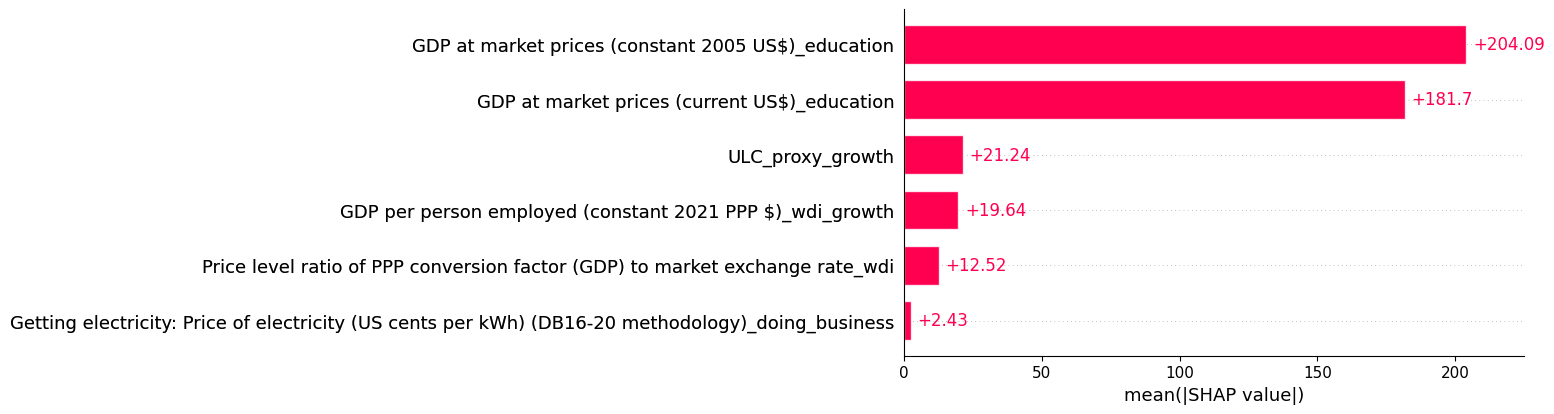

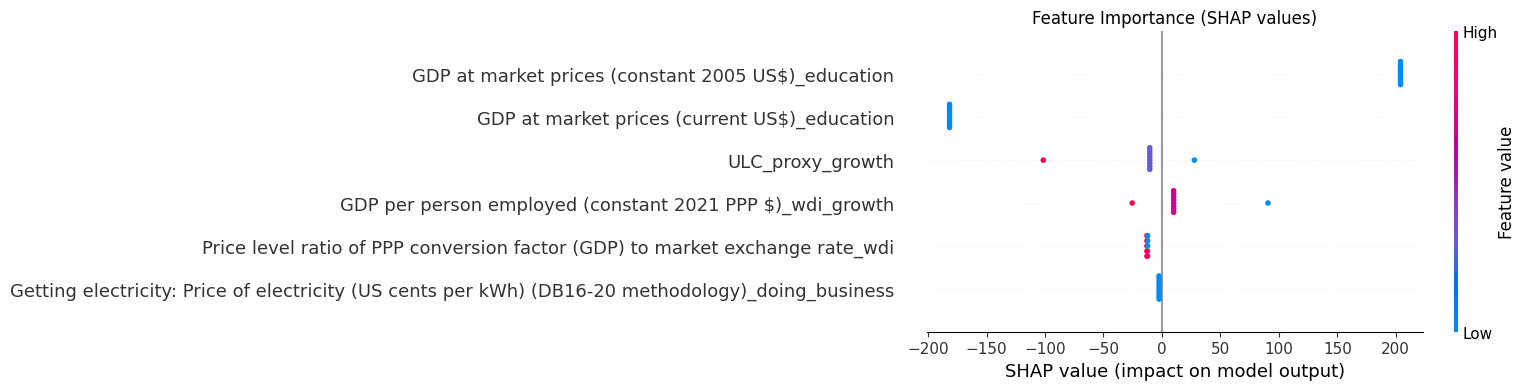

In [9]:
import shap
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# --- Why we're doing this (technical) ---
# SARIMAX models include both autoregressive/moving-average parts (time dependence)
# and a regression on exogenous variables (X).
# SHAP doesn't directly support statsmodels' SARIMAX objects,
# so we train a LinearRegression "surrogate" using the same exogenous features.
# This lets us interpret the feature contributions (via SHAP) to CPI predictions.

# --- Why we're doing this (non-technical) ---
# Policymakers and stakeholders want to know "which factors drive inflation?"
# SHAP helps explain the model by showing how much each feature
# (like productivity, labor costs, energy, or GDP) pushes inflation up or down.
# It's basically a way to "open the black box" and make results understandable.

# --- 1. Prepare data ---
X = eda_core_clean[
    [
        "GDP at market prices (constant 2005 US$)_education",
        "GDP at market prices (current US$)_education",
        "Price level ratio of PPP conversion factor (GDP) to market exchange rate_wdi",
        "Getting electricity: Price of electricity (US cents per kWh) (DB16-20 methodology)_doing_business",
        "GDP per person employed (constant 2021 PPP $)_wdi_growth",
        "ULC_proxy_growth"
    ]
].fillna(0)

y = eda_core_clean["Consumer price index (2010 = 100)_wdi"]

# Use the same train/test split as before
split = -10
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

# --- 2. Fit surrogate model ---
surrogate = LinearRegression()
surrogate.fit(X_train, y_train)

# --- 3. Run SHAP ---
explainer = shap.Explainer(surrogate, X_train)
shap_values = explainer(X_test)

# --- 4. Visualize feature importance ---
# Summary bar plot: shows average importance of each feature
shap.plots.bar(shap_values, max_display=10)
plt.title("Feature Importance (SHAP values)")

# Beeswarm plot: shows how each feature contributes to predictions for each test case
shap.plots.beeswarm(shap_values, max_display=10)


# Conclusion — Wage Policy Impact Modeling

## Technical Conclusion

1. **Statistical Tests**
   - CPI (WDI) is non-stationary; differencing is required.  
   - Productivity growth and ULC growth are weakly stationary, making them valid exogenous regressors.  
   - Granger causality shows both productivity growth and ULC growth **help predict CPI with lags of 1–3 years**. This supports their inclusion in the model. :contentReference[oaicite:0]{index=0}

2. **Model Results**
   - Simpler ARIMA-family models (ARIMAX(1,1,0), SARIMAX(1,1,1)) fit better than complex alternatives.  
   - Current models show strong co-movement of CPI with GDP levels; this tends to overshadow other drivers.  
   - SHAP analysis reveals that while GDP dominates in the current specification, **ULC growth and productivity growth still make meaningful contributions** to CPI dynamics.

3. **Interpretation**
   - Wage increases affect CPI through ULC, but the effect appears **with a delay** rather than immediately.  
   - This does **not mean wage increases are harmful**. It means the inflationary impact depends on whether productivity keeps pace with rising labor costs.  
   - If productivity growth accompanies wage growth, the inflationary effect is limited while household income and demand rise.  
   - If wages rise faster than productivity, part of the increase is likely to pass into higher prices after 1–3 years.

---

## Non-Technical Conclusion

- The evidence shows that **wage increases do matter** for inflation, but their impact is **delayed** and depends on how productivity moves.  
- Higher wages raise household income, strengthen demand, and can support economic growth. These are **positive effects**.  
- The risk is that if wages rise **without matching productivity gains**, businesses may eventually raise prices to cover higher labor costs, leading to inflation.  
- The message for policymakers is clear:  
  - Wage reforms can and should improve workers’ welfare.  
  - To maximize benefits and minimize inflation risks, they should be paired with policies that **boost productivity** (skills development, technology adoption, and competitiveness).  

**In plain terms:** Wage hikes are not inherently bad for the economy. They are beneficial for workers and can support growth, but to keep inflation under control, they must be matched with efforts that help the economy produce more efficiently.
